   # Jayson Tatum
   ### NBA draft: 2017 (Round: 1 / Pick: 3)

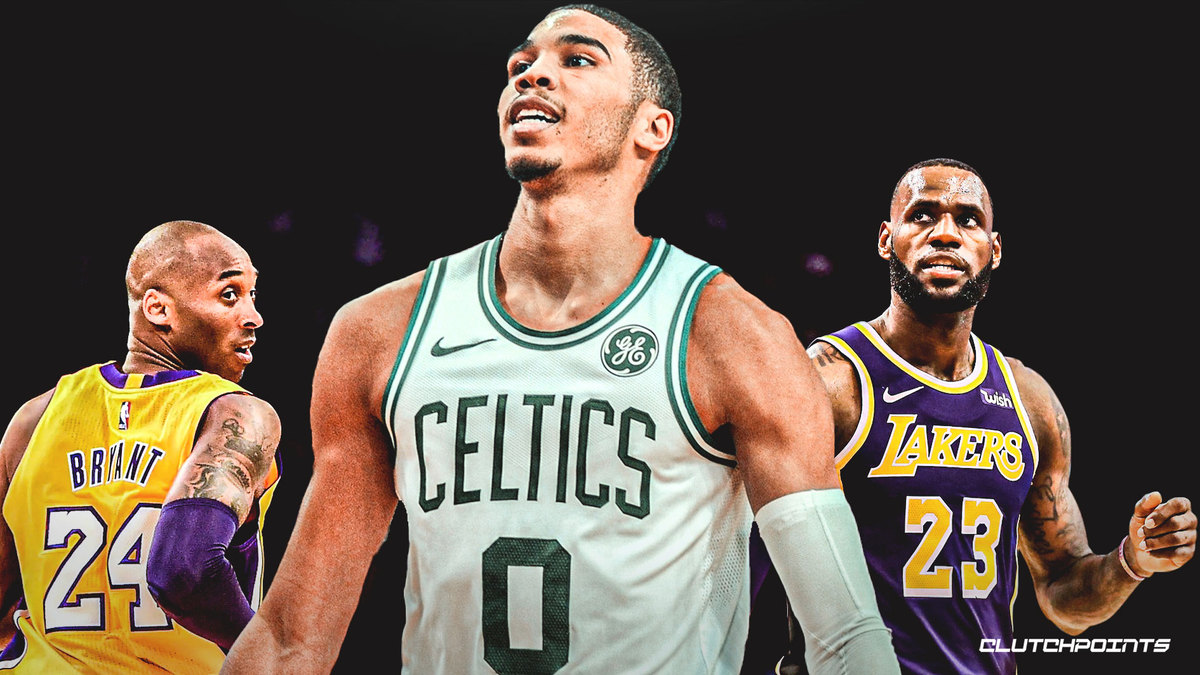

In [161]:
from IPython.display import Image
Image(r"C:\Users\dee\Documents\Python\Tatum/tatum.jpg")

Reference: https://clutchpoints.com/jayson-tatum-makes-history-with-record-lebron-james-kobe-bryant-failed-to-achieve/

## Tatum is celtics player with a huge potential. Some people say that his game is closer to Kobe Bryant with his ability to score these mid range shots. Others argue that his ability to attack the basket efficient, reminds Lebron James style.

### With this notebook I will try to use advanced data from these players to answer the above question. In this equation I will add Michael Jordan's data for any interesting outcomes. In addition, I will create a machine learning model to predict whose career of these legends, Jayson Tatum's will be closer. 
#### Data extracted from "https://www.basketball-reference.com/"

### Import Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [163]:
df_tatum = pd.read_csv("per_game_stats_Tatum.csv")
#df_tatum.head(6)

In [164]:
df_reg=df_tatum[df_tatum["RSorPO"]=='Regular Season']
df_reg

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
1,2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2,2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season


In [165]:
df_playoffs=df_tatum[df_tatum["RSorPO"]=='Playoffs']
df_playoffs

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
3,2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
4,2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs
5,2019-20,21,BOS,NBA,PF,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,5.8,12.2,0.471,0.504,5.9,7.2,0.813,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,Jason Tatum,Playoffs


In [166]:
df_reg.set_index(['Season'],inplace=True)
df_playoffs.set_index(['Season'],inplace=True)

In [167]:
df_tatum.set_index(['Season'],inplace=True)

In [168]:
df_new=pd.concat([df_reg,df_playoffs],axis=1)
#df_new.head()

### First thing we want to visualize some data from Jayson Tatum's first three seasons

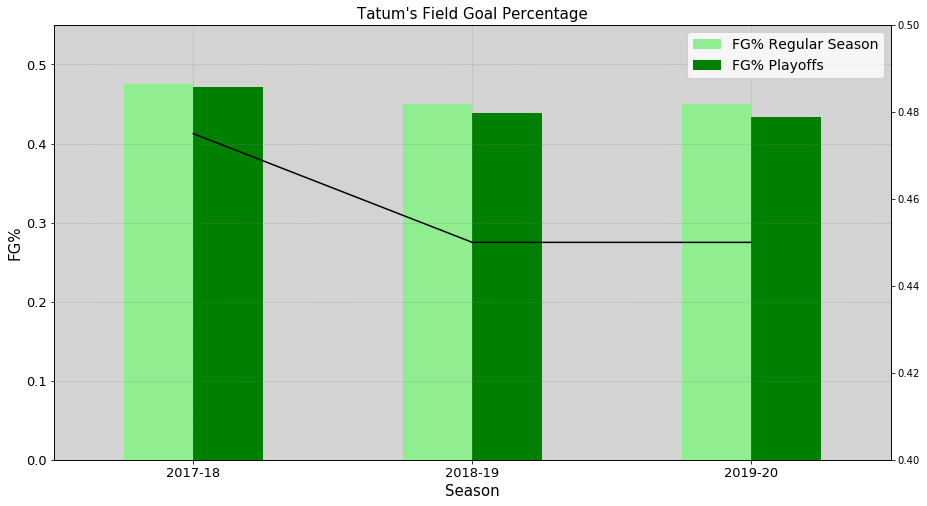

In [169]:
ax=df_new['FG%'].plot(kind='bar',figsize=(15,8),color=['lightgreen','green'],alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Field Goal Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('FG%',fontsize=15)
ax.legend(['FG% Regular Season','FG% Playoffs'],fontsize=14)
ax.set_ylim(0,0.55)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax1 = ax.twinx()
ax1=df_reg['FG%'].plot(kind='line',color=['black'])
ax1.set_ylim(0.4,0.5)
plt.show()

In [170]:
df_reg['FG%']

Season
2017-18    0.475
2018-19    0.450
2019-20    0.450
Name: FG%, dtype: float64

### We see that his field goal percentage is higher in the first season than the second and third. The drop was low though from 47.5% in the 1st to 45% in the 2nd and 3rd. This is maybe because he wasn't taking too much shoots in the first season as the second and third. Let's find out

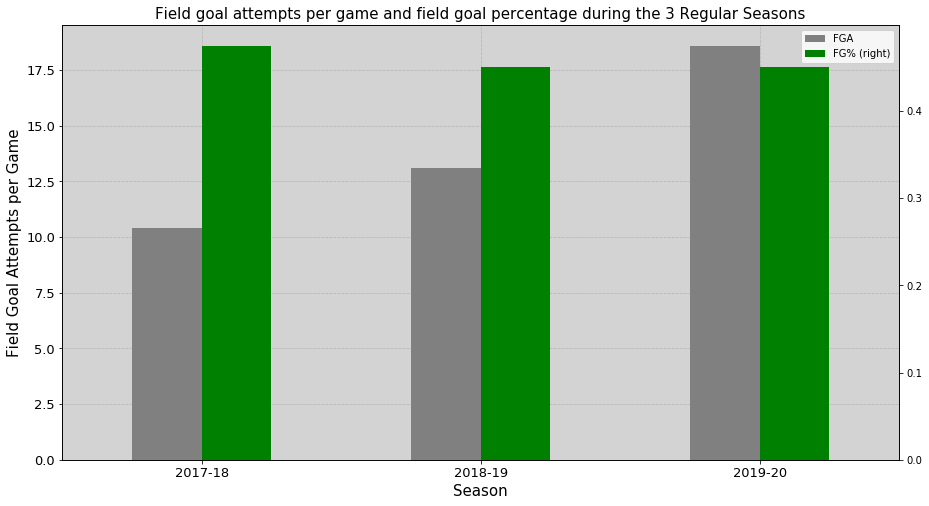

In [171]:
ax2=df_reg[['FGA','FG%']].plot(kind='bar',figsize=(15,8),color=['grey','green'],secondary_y='FG%')
ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_title('Field goal attempts per game and field goal percentage during the 3 Regular Seasons',fontsize=15)
ax2.set_ylabel('Field Goal Attempts per Game',fontsize=15)
ax2.set_xlabel('Season',fontsize=15)
ax2.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax2.tick_params(axis='y',which='major',labelsize=13)

### This proof what we assumed. That this small drop in the FG% is becasue he takes more attempts the last two seasons. Significant is that he is realy improved in the third season where he increased the attempts from 13.1 to 18.6 with the same FG%

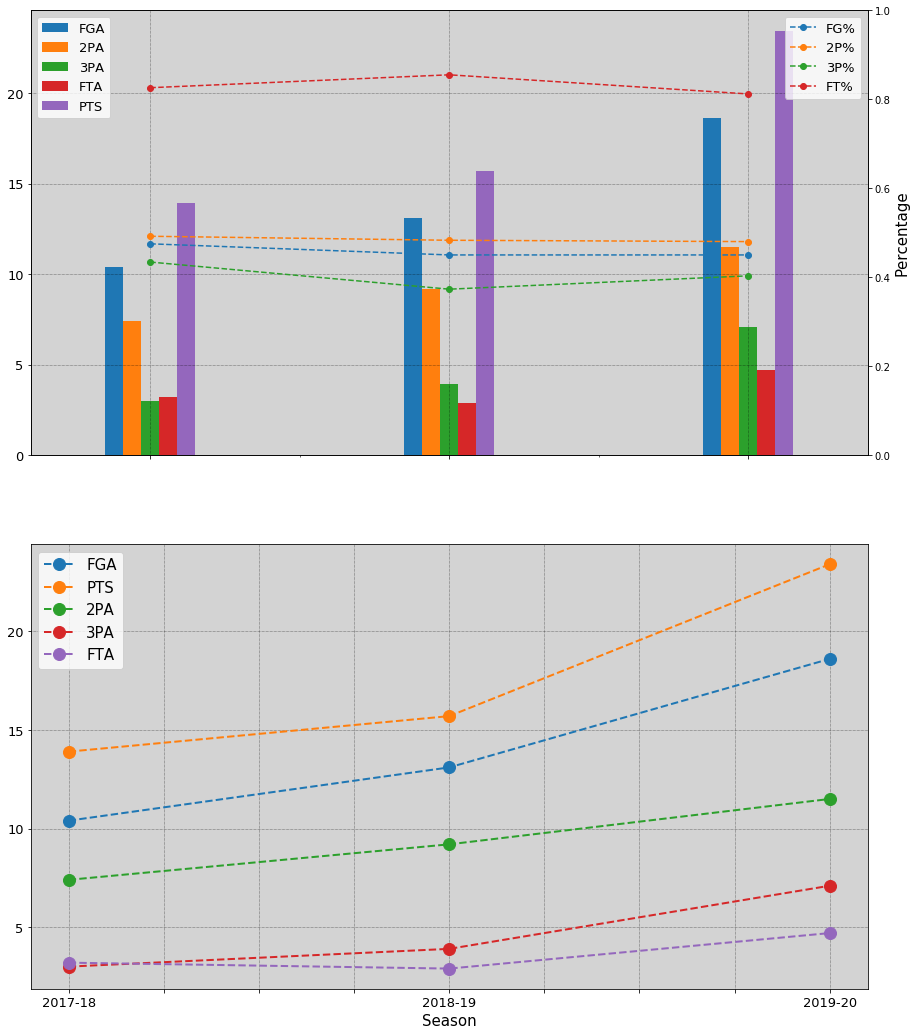

In [172]:
df_reg_new=df_reg[['FGA','FG%','3PA','3P%','2PA','2P%','FTA','FT%','TRB','AST','STL','BLK','TOV','PTS']]

fig=plt.figure(figsize=(15,18))

ax=fig.add_subplot(2,1,1)
ax=df_reg_new[['FGA','2PA','3PA','FTA','PTS']].plot(kind='bar',width=0.3,align='center',ax=ax)
#ax3=df_reg_new[['2PA','3PA']].plot(kind='bar',stacked=True,width=0.1,align='center',ax=ax,alpha=0.2,color=['grey','lightgrey'])
ax.legend(loc='upper left',fontsize=13)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Season',fontsize=13)
ax.set_ylabel('')
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.grid(color='black', linestyle='dotted', linewidth=0.5)
ax2=ax.twinx()
ax2=df_reg_new[['FG%','2P%','3P%','FT%']].plot(kind='line',style='o--',ax=ax2)
ax2.set_ylim(0,1)
ax2.set_ylabel('Percentage',fontsize=15)
ax2.tick_params(axis='y',which='major',labelsize=10)
ax2.set_xlabel('Season',fontsize=13)
ax2.legend(loc='upper right',fontsize=13)

ax1=fig.add_subplot(2,1,2)
ax1=df_reg_new[['FGA','PTS','2PA','3PA','FTA']].plot(kind='line',style='o--',linewidth=2,ms=12,ax=ax1)
ax1.set_facecolor('lightgrey')
ax1.legend(fontsize=15)
ax1.set_xlabel('Season',fontsize=15)
ax1.tick_params(axis='both',which='major',labelsize=13)
ax1.grid(color='black', linestyle='dotted', linewidth=0.5)


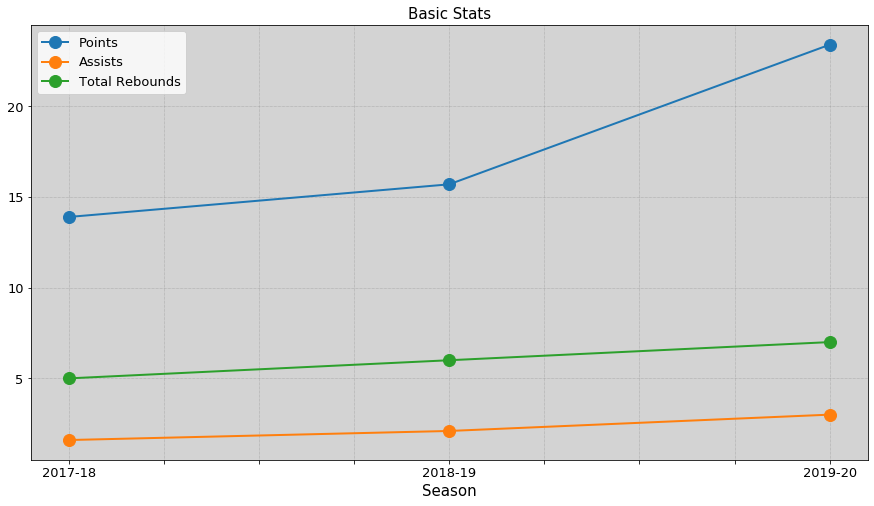

In [173]:
ax=df_reg_new[['PTS','AST','TRB']].plot(kind='line',style='o-',linewidth=2,ms=12,figsize=(15,8))
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Basic Stats',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Points','Assists','Total Rebounds'],fontsize=13,loc='upper left')

In [174]:
df_shoot=pd.read_csv("Shooting stats_tatum.csv")

In [175]:
df_shoot.set_index(['Season'],inplace=True)
df_shoot.head(6)

,Age,Tm,Lg,Pos,G,MP,FG%,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Player,REorPL
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19.0,BOS,NBA,SF,80.0,2438.0,0.475,12.7,0.710,0.320,0.107,0.096,0.188,0.290,0.492,0.629,0.258,0.438,0.420,0.434,0.565,0.924,0.071,51.0,0.227,0.564,0.0,0.0,Jason Tatum,Regular Season
2018-19,20.0,BOS,NBA,SF,79.0,2455.0,0.450,13.6,0.700,0.261,0.133,0.137,0.169,0.300,0.483,0.678,0.326,0.430,0.349,0.373,0.497,0.853,0.070,68.0,0.273,0.341,0.0,0.0,Jason Tatum,Regular Season
2019-20,21.0,BOS,NBA,PF,66.0,2265.0,0.450,14.4,0.617,0.248,0.155,0.126,0.089,0.383,0.480,0.618,0.374,0.396,0.394,0.403,0.433,0.545,0.050,56.0,0.171,0.413,3.0,0.0,Jason Tatum,Regular Season
2017-18,19.0,BOS,NBA,SF,19.0,683.0,0.471,11.9,0.728,0.372,0.096,0.107,0.153,0.272,0.526,0.639,0.280,0.464,0.450,0.324,0.510,0.565,0.069,16.0,0.197,0.286,0.0,0.0,Jason Tatum,Playoffs
2018-19,20.0,BOS,NBA,SF,9.0,295.0,0.438,13.1,0.723,0.286,0.134,0.125,0.179,0.277,0.481,0.594,0.267,0.286,0.600,0.323,0.590,1.000,0.089,10.0,0.226,0.286,0.0,0.0,Jason Tatum,Playoffs
2019-20,21.0,BOS,NBA,PF,17.0,690.0,0.434,15.0,0.623,0.219,0.162,0.162,0.081,0.377,0.471,0.589,0.389,0.519,0.222,0.373,0.378,0.638,0.042,11.0,0.071,0.333,1.0,0.0,Jason Tatum,Playoffs


In [176]:
df_shoot_career=df_shoot
df_shoot.dropna(inplace=True)

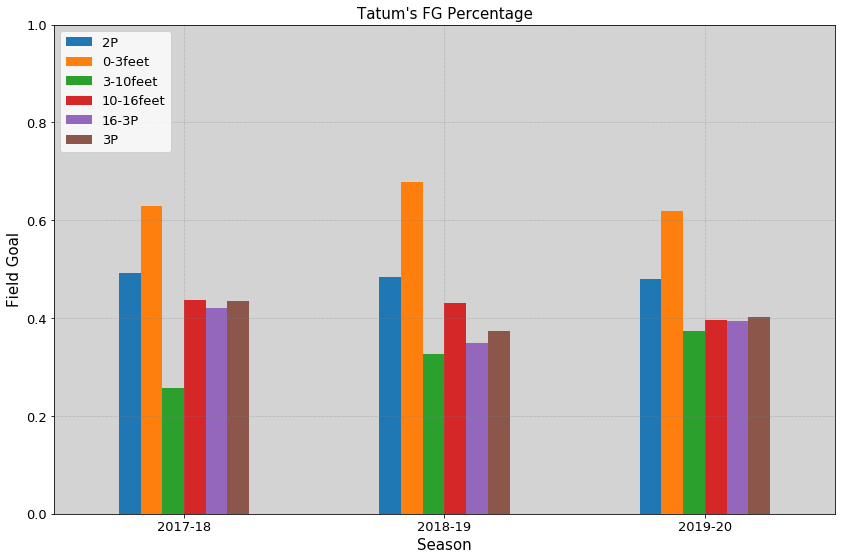

In [177]:
ax=df_shoot[df_shoot['REorPL']=='Regular Season'][['2P.1','0-3.1','3-10.1','10-16.1','16-3P.1','3P.1']].plot(kind='bar',figsize=(14,9),alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's FG Percentage",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Field Goal',fontsize=15)
ax.set_ylim(0,1)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(['2P','0-3feet','3-10feet','10-16feet','16-3P','3P'],loc='upper left',fontsize=13)
plt.show()

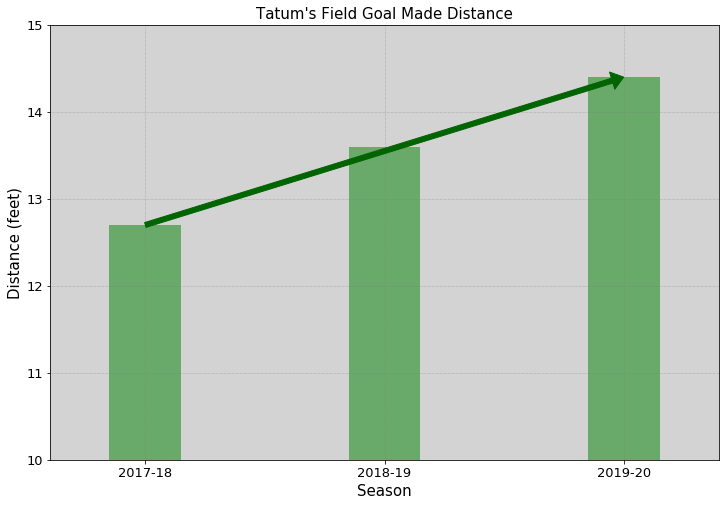

In [178]:
df_shoot.dropna()
ax=df_shoot[(df_shoot['REorPL']=='Regular Season')]['Dist.'].plot(kind='bar',figsize=(12,8),color='green',alpha=0.5,width=0.3)
#ax=df_shoot[df_shoot['REorPL']=='Regular Season']['Dist.'].plot(kind='line',color='darkgreen',linewidth=3)
ax.set_facecolor('lightgrey')
ax.set_title("Tatum's Field Goal Made Distance",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Distance (feet)',fontsize=15)
ax.set_ylim(10,15)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)

ax.annotate('',                      # s: str. Will leave it blank for no text
             xy=(2, 14.4),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(0, 12.7),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(connectionstyle='arc3', color='darkgreen',headwidth=18,width=5)
            )
plt.show()

### This graph is showing that Tatum's shoots distance is increaing through the first three seasons. What information is missing from this is if this is because Tatum shoots more 3pts or if he is attacking the basket less and shoots more mid range 2pts. Let's find out with the next graph

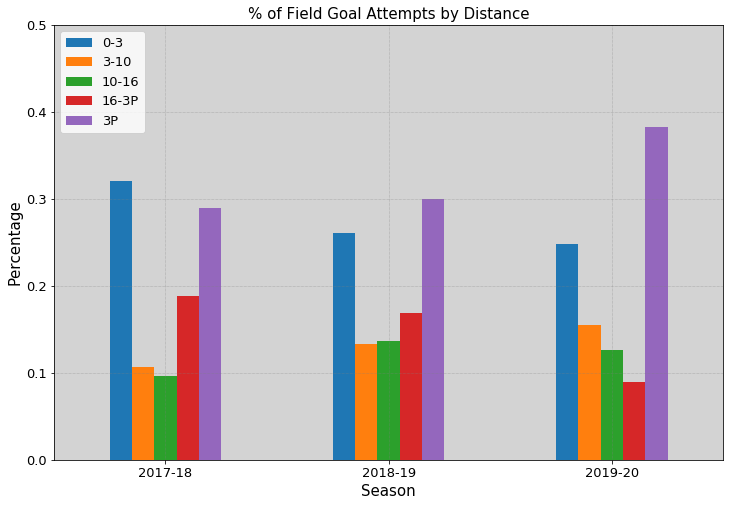

In [179]:
ax=df_shoot[df_shoot['REorPL']=='Regular Season'][['0-3','3-10','10-16','16-3P','3P']].plot(kind='bar',figsize=(12,8),alpha=1)
ax.set_facecolor('lightgrey')
ax.set_title("% of Field Goal Attempts by Distance",fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.set_ylim(0,0.5)
ax.tick_params(axis='x', which='major', labelsize=13,labelrotation=0)
ax.tick_params(axis='y', which='major', labelsize=13)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.legend(loc='upper left',fontsize=13)
plt.show()

### So this shows that the main reason is that he is shooting more 3pts. Also he is shooting less mid ranges from 16feet until the 3pt line.

In [180]:
df_shoot_career=pd.read_csv("Shooting stats_tatum.csv")
df_shoot_career.drop([3,4,5,6,7,8],inplace=True)
df_shoot_career=df_shoot_career[['0-3','3-10','10-16','16-3P','3P']]
df_shoot_career['Total Shots']=['2017-18','2018-19','2019-20']
df_shoot_career.set_index(['Total Shots'],inplace=True)
df_shoot_career=df_shoot_career.T
df_shoot_career

Total Shots,2017-18,2018-19,2019-20
0-3,0.320,0.261,0.248
3-10,0.107,0.133,0.155
10-16,0.096,0.137,0.126
16-3P,0.188,0.169,0.089
3P,0.290,0.300,0.383


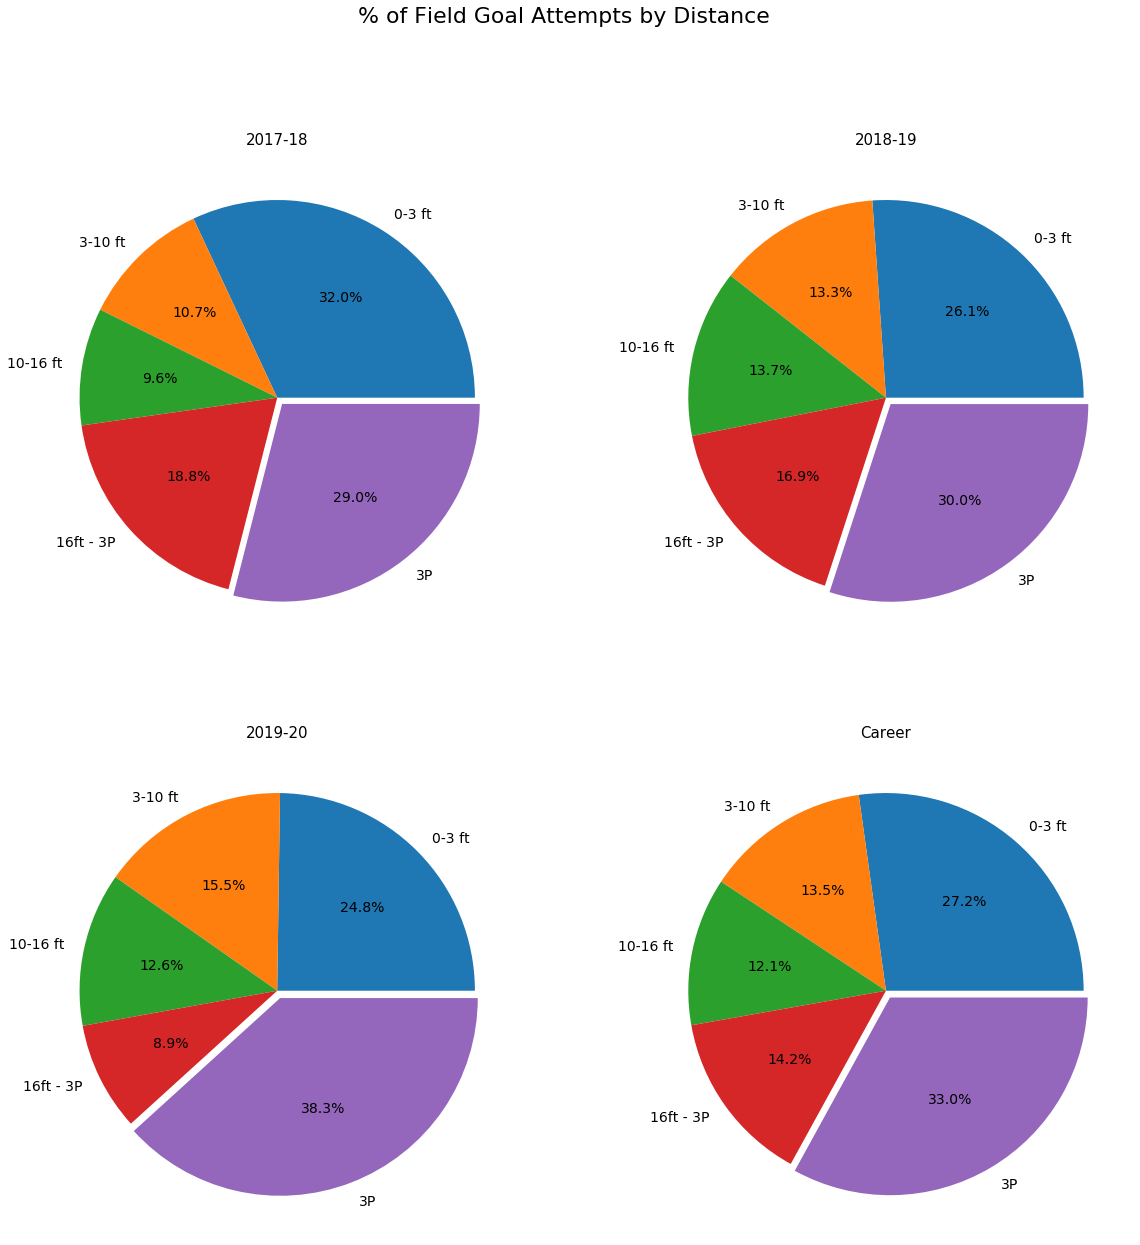

In [181]:
df_shoot_career=pd.read_csv("Shooting stats_tatum.csv")
df_shoot_career.drop([3,4,5,7,8],inplace=True)
df_shoot_career=df_shoot_career[['0-3','3-10','10-16','16-3P','3P']]
df_shoot_career.rename(columns={'0-3':"0-3 ft",'3-10':'3-10 ft','10-16':'10-16 ft','16-3P':'16ft - 3P'},inplace=True)
df_shoot_career['Total Shots']=['2017-18','2018-19','2019-20','Career']
df_shoot_career.set_index(['Total Shots'],inplace=True)
df_shoot_career=df_shoot_career.T
df_shoot_career
#print(df_shoot_career)
fig=plt.figure(figsize=(20,20))
fig.suptitle('% of Field Goal Attempts by Distance',fontsize=22)
ax=fig.add_subplot(2,2,1)
ax=df_shoot_career['2017-18'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax.set_title(f"2017-18",fontsize=15)
ax.set_ylabel('')

ax1=fig.add_subplot(2,2,2)
ax1=df_shoot_career['2018-19'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax1.set_title(f"2018-19",fontsize=15)
ax1.set_ylabel('')

ax2=fig.add_subplot(2,2,3)
ax2=df_shoot_career['2019-20'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax2.set_title(f"2019-20",fontsize=15)
ax2.set_ylabel('')

ax3=fig.add_subplot(2,2,4)
ax3=df_shoot_career['Career'].plot(kind='pie',labels=df_shoot_career.index,explode=[0,0,0,0,0.04],autopct='%1.1f%%',fontsize=14)
ax3.set_title(f"Career",fontsize=15)
ax3.set_ylabel('')

plt.show()

In [182]:
df_tatum.head()

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-18,19,BOS,NBA,SF,80,80,30.5,5.0,10.4,0.475,1.3,3.0,0.434,3.7,7.4,0.492,0.538,2.7,3.2,0.826,0.6,4.4,5.0,1.6,1.0,0.7,1.4,2.1,13.9,Jason Tatum,Regular Season
2018-19,20,BOS,NBA,SF,79,79,31.1,5.9,13.1,0.450,1.5,3.9,0.373,4.4,9.2,0.483,0.506,2.5,2.9,0.855,0.9,5.2,6.0,2.1,1.1,0.7,1.5,2.1,15.7,Jason Tatum,Regular Season
2019-20,21,BOS,NBA,PF,66,66,34.3,8.4,18.6,0.450,2.9,7.1,0.403,5.5,11.5,0.480,0.527,3.8,4.7,0.812,1.0,6.0,7.0,3.0,1.4,0.9,2.3,2.1,23.4,Jason Tatum,Regular Season
2017-18,19,BOS,NBA,SF,19,19,35.9,6.5,13.7,0.471,1.2,3.7,0.324,5.3,10.0,0.526,0.515,4.3,5.1,0.845,0.5,3.8,4.4,2.7,1.2,0.5,2.2,2.6,18.5,Jason Tatum,Playoffs
2018-19,20,BOS,NBA,SF,9,9,32.8,5.4,12.4,0.438,1.1,3.4,0.323,4.3,9.0,0.481,0.482,3.2,4.3,0.744,0.8,5.9,6.7,1.9,1.1,0.8,2.0,2.3,15.2,Jason Tatum,Playoffs


In [183]:
dfnew=pd.read_csv('per_game_stats.csv')
dfnew.head(2)

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,0.42,0.8,2.7,0.30,7.1,16.1,0.438,0.438,4.4,5.8,0.76,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,0.47,1.4,3.9,0.36,8.6,17.2,0.499,0.504,6.0,8.0,0.75,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,Lebron James,Regular Season


In [184]:
df_kobe=dfnew[dfnew['Player']=='Kobe Bryant']
df_kobe.set_index('Season',inplace=True)
df_kobe_reg=df_kobe[df_kobe['RSorPO']=='Regular Season']
df_kobe_pl=df_kobe[df_kobe['RSorPO']=='Playoffs']
df_kobe_FGreg=df_kobe_reg[['FGA','FG%']]
df_kobe_FGreg.rename(columns={'FGA':'FGA Regular','FG%':'FG% Regular'},inplace=True)
df_kobe_FGpl=df_kobe_pl[['FGA','FG%']]
df_kobe_FGpl.rename(columns={'FGA':'FGA Playoffs','FG%':'FG% Playoffs'},inplace=True)
df_kobe_FG=pd.concat([df_kobe_FGreg,df_kobe_FGpl],axis=1)
df_kobe_FG.head()

c:\users\dee\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,FGA Regular,FG% Regular,FGA Playoffs,FG% Playoffs
1996-97,5.9,0.42,6.1,0.38
1997-98,11.6,0.42,6.9,0.41
1998-99,15.6,0.46,17.8,0.43
1999-00,17.9,0.47,17.9,0.44
2000-01,22.2,0.46,22.4,0.47


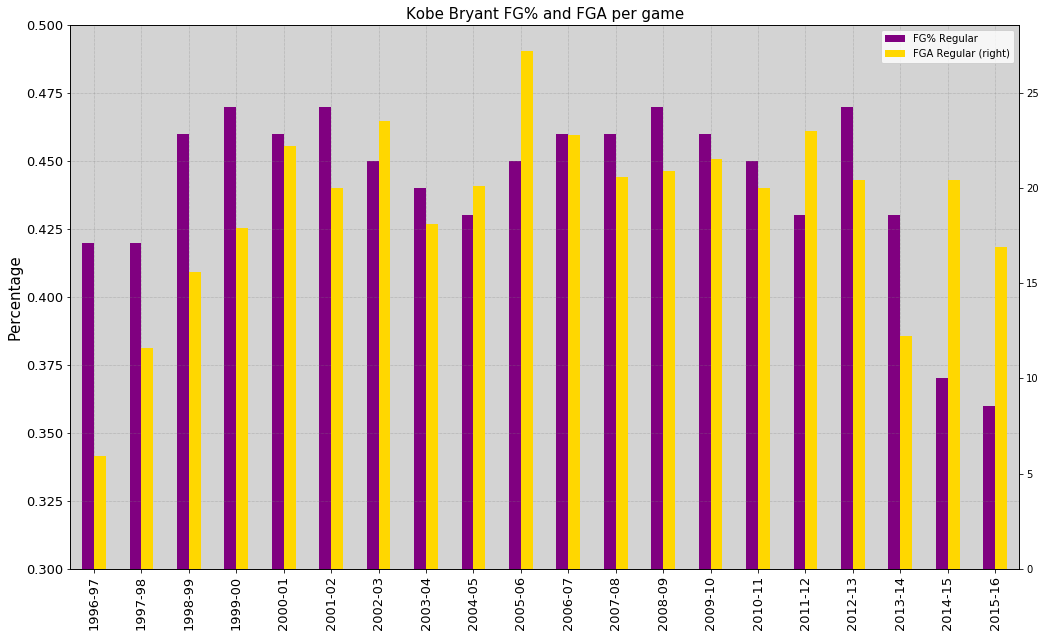

In [185]:
ax=df_kobe_FG[['FG% Regular','FGA Regular']].plot(kind='bar',figsize=(17,10),color=['purple','gold'],secondary_y='FGA Regular')
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Kobe Bryant FG% and FGA per game',fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_ylim(0.3,0.5)
plt.show()

In [186]:
df_kobe_stats=df_kobe[df_kobe['RSorPO']=='Regular Season'][['PTS','AST','TRB','STL']]
df_kobe_stats.head()

,PTS,AST,TRB,STL
Season,,,,
1996-97,7.6,1.3,1.9,0.7
1997-98,15.4,2.5,3.1,0.9
1998-99,19.9,3.8,5.3,1.4
1999-00,22.5,4.9,6.3,1.6
2000-01,28.5,5.0,5.9,1.7


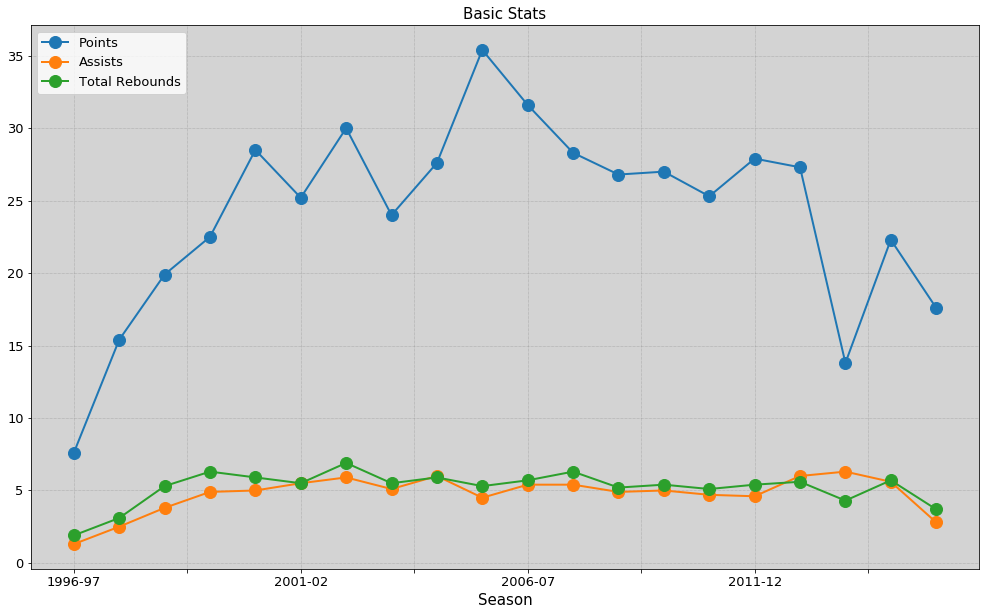

In [187]:
ax=df_kobe_stats[['PTS','AST','TRB']].plot(kind='line',style='o-',linewidth=2,ms=12,figsize=(17,10))
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Basic Stats',fontsize=15)
ax.set_xlabel('Season',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=13,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=13)
ax.legend(['Points','Assists','Total Rebounds'],fontsize=13,loc='upper left')